<a href="https://colab.research.google.com/github/VeraMendes/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Vera_Mendes_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [78]:
values = np.array([3505, 2400, 3027, 2798, 3700, 3250, 2689])

def mean(numbers):   
  Total = sum(numbers)   
  mean = Total / len(numbers)
  return mean

mean(values)


3052.714285714286

In [81]:
def variance(numbers):

  meanval = mean(numbers)
  # print(meanval)
  lenght = len(numbers)

  sumAll=0.0
  for a in numbers:
    # print(a)
    x = a-meanval #Xi-Xm
    y = x**2
    sumAll = sumAll+y
  return(sumAll/lenght)

print(variance(values))

183761.06122448976


In [86]:
def std(numbers):

    return (variance(numbers)) ** (1/2)

print(std(values))

428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use library functions for calculating the covariance since we didn't specifically talk about its formula)

In [92]:
import numpy as np
customers = np.array([127, 80, 105, 92, 120, 115, 93])
sales = values
Covariance = np.cov(customers, sales, ddof=1)[0][1]
print(Covariance)

7604.357142857142


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [94]:
print(std(customers))

15.792015549069118


In [105]:
pd.Series(sales)

0    3505
1    2400
2    3027
3    2798
4    3700
5    3250
6    2689
dtype: int64

In [106]:
pd.Series(customers)

0    127
1     80
2    105
3     92
4    120
5    115
6     93
dtype: int64

In [111]:
print (np.corrcoef(sales,customers))

[[1.         0.96283398]
 [0.96283398 1.        ]]


In [113]:
pd.Series(sales).corr(pd.Series(customers))

0.9628339778148909

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'

In [31]:
import pandas as pd
df = pd.read_csv(url)
df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [114]:
df.dtypes

Unnamed: 0            int64
pclass              float64
survived            float64
name                 object
sex                  object
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
cabin                object
embarked             object
boat                 object
body                float64
home.dest            object
has_cabin_number      int64
dtype: object

In [122]:
df.isnull().sum()

Unnamed: 0             0
pclass                 1
survived               1
name                   1
sex                    1
age                    0
sibsp                  1
parch                  1
ticket                 1
fare                   2
cabin               1015
embarked               0
boat                 824
body                1189
home.dest            565
has_cabin_number       0
dtype: int64

In [116]:
df1 = df._get_numeric_data()
df1.head()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
0,1,1.0,1.0,29.0000,0.0,0.0,211.3375,NaN,1
1,2,1.0,1.0,0.9167,1.0,2.0,151.5500,NaN,1
2,3,1.0,0.0,2.0000,1.0,2.0,151.5500,NaN,1
3,4,1.0,0.0,30.0000,1.0,2.0,151.5500,135.0,1
4,5,1.0,0.0,25.0000,1.0,2.0,151.5500,NaN,1


In [123]:
df1.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [124]:
df1.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [0]:
import matplotlib.pyplot as plt

In [0]:
v_1 = [0,1]
v_2 = [1,0]

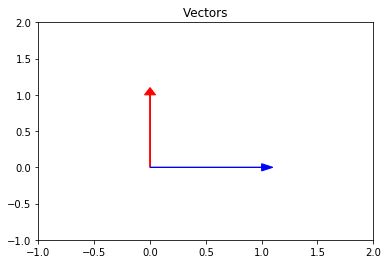

In [37]:
plt.axis([-1, 2, -1, 2])
plt.arrow(0,0, v_1[0],v_1[1], head_width=.1, head_length=.1, color = "r")
plt.arrow(0,0, v_2[0], v_2[1], head_width=.1, head_length=.1, color = "b")
plt.title("Vectors")
plt.show()

### Synonym of orthogonal is perpendicular.

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
v_a = [-5,3,7]
v_b = [6,-8,2]

In [70]:
aa = np.array([-5,3,7])
bb = np.array([6,-8,2])

dot_product = (aa*bb).sum()
dot_product

# dot product is not 0, not orthogonal.

-40

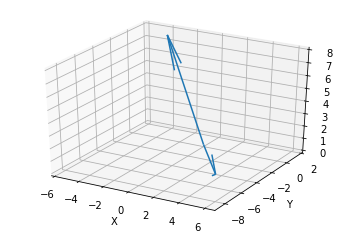

In [40]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

array = np.array([[0, 0, 0, -5, 3, 7], [0, 0, 0, 6, -8, 2]])

X, Y, Z, U, V, W= zip(*array)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W)
ax.set_xlim([-6, 6.5])
ax.set_ylim([-9, 2])
ax.set_zlim([0, 8])
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

### they are not orthogonal.

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = [2, -15, 6, 20]
ca = np.array(c)

In [66]:
from numpy import linalg as LA

c1 = (LA.norm(ca))**2
c1

665.0

In [67]:
c2 = (ca*ca).sum()
c2

665

In [64]:
ca.T

array([  2, -15,   6,  20])

In [68]:
c3 = (ca.T)*ca 
c3

array([  4, 225,  36, 400])

### Final results for the top ones are 665 and sum of the last array is 665.

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix}\end{align}
\begin{align}
\qquad 
e = 2\begin{bmatrix} 1 \\ 0 \\ 0  \end{bmatrix}+11\begin{bmatrix} 0 \\ 1 \\ 0  \end{bmatrix}+(-8)\begin{bmatrix} 0 \\ 0 \\ 1  \end{bmatrix}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

\begin{align}
f = \begin{bmatrix} 4 \\ 12 \\ 11 \\ 9 \\ 2 \end{bmatrix} = 4\begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \\ 0\end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \\ 0\end{bmatrix} + 11\begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \\ 0\end{bmatrix}+ 9\begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \\ 0\end{bmatrix}+ 2\begin{bmatrix} 0 \\ 0 \\ 0 \\ 0 \\ 1\end{bmatrix}
\end{align} 

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

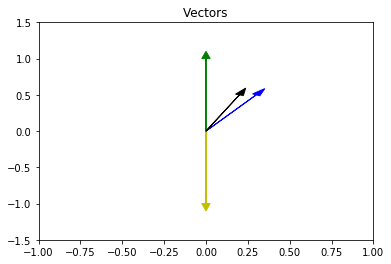

In [129]:
plt.axis([-1, 1, -1.5, 1.5])

v_1= [0,1]
v_2= [0, -1]
# dependent
plt.arrow(0,0, v_1[0],v_1[1], head_width=.05, head_length=.1, color = "g")
plt.arrow(0,0, v_2[0], v_2[1], head_width=.05, head_length=.1, color = "y")

v_3= [.3, .5]
v_4= [.2, .5]
# independent
plt.arrow(0,0, v_3[0],v_3[1], head_width=.05, head_length=.1, color = "b")
plt.arrow(0,0, v_4[0], v_4[1], head_width=.05, head_length=.1, color = "k")

plt.title("Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
# They span 1 dimension. There is redundancy. Linear dependent vectors.

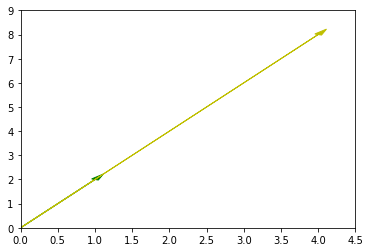

In [140]:
plt.axis([0, 4.5, 0, 9])

v_1= [1,2]
v_2= [4, 8]
# dependent
plt.arrow(0,0, v_1[0],v_1[1], head_width=.1, head_length=.25, color = "g")
plt.arrow(0,0, v_2[0], v_2[1], head_width=.1, head_length=.25, color = "y")
plt.show()

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
# they span 3 dimensions.

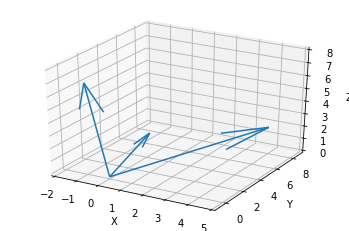

In [131]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

array = np.array([[0, 0, 0, 1, 2, 3], [0, 0, 0, -1, 0, 7],[0, 0, 0, 4, 8, 2]])

X, Y, Z, U, V, W= zip(*array)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W)
ax.set_xlim([-2, 5])
ax.set_ylim([-1, 9])
ax.set_zlim([0, 8])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



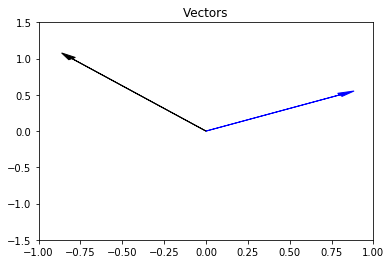

In [136]:
plt.axis([-1, 1, -1.5, 1.5])
v_3= [.8, .5]
v_4= [-.8, 1]
plt.arrow(0,0, v_3[0],v_3[1], head_width=.05, head_length=.1, color = "b")
plt.arrow(0,0, v_4[0], v_4[1], head_width=.05, head_length=.1, color = "k")

plt.title("Vectors")
plt.show()

## 6.2 What does it mean to form a basis?

### vectors linearly independent that span the vector space V.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [138]:
from numpy.linalg import matrix_rank
P = np.mat([[1,2,3],[-1,0,7],[4,8,2]])
matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

### Tell us the dimension of the vector space spanned by its columns. If there is a certain redundancy within the rows/columns, of a matrix, this means that this rank might not be equal to the dimension of the matrix.  

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

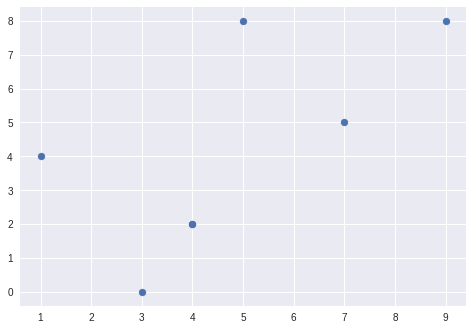

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()